# Toxicity by topic in the comments

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re, math, os
import operator

In [2]:
TOPIC_MODELLING_DIR = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/Topic_Modelling/'
DATA_DIR = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/'

THRESHOLD_PROBABILITY = 0.10

SAVE = True
SAVE_FOLDER = 'TACT/img/topics_toxicity/'
os.makedirs(SAVE_FOLDER, exist_ok=True)

In [3]:
def plotAgainstTopics(x,y):
    sns.set_context('talk')
    sns.set(rc={'figure.figsize':(12,8)})

    fig,ax = plt.subplots(1,1)
    sns.barplot(x, y)#, s=100)
    ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
    plt.xlabel('Topics', fontsize=20)
    plt.ylabel('Average toxicity', fontsize=20)
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    plt.ylim([0,0.30])
    ax.tick_params(axis='both', which='major', labelsize=13)
    plt.tight_layout()

    return fig

In [4]:
def getPlottableDataFrame(merged):

    topic_counts = [0] * 15
    topic_toxicity = [0] * 15

    def getCountsAndToxicity(merged_row):
        topic_probabilities = eval(merged_row['topic_probabilities'])

        for topic_prob in topic_probabilities:
            if topic_prob[1] > THRESHOLD_PROBABILITY:
                topic_counts[topic_prob[0]] += 1
                topic_toxicity[topic_prob[0]] += merged_row['TOXICITY_probability']

    merged.apply(getCountsAndToxicity, axis=1)

    to_plot = (pd.DataFrame(topic_toxicity) / pd.DataFrame(topic_counts)).reset_index().rename({'index' : 'x', 0 : 'y'}, axis=1)
    
    return to_plot

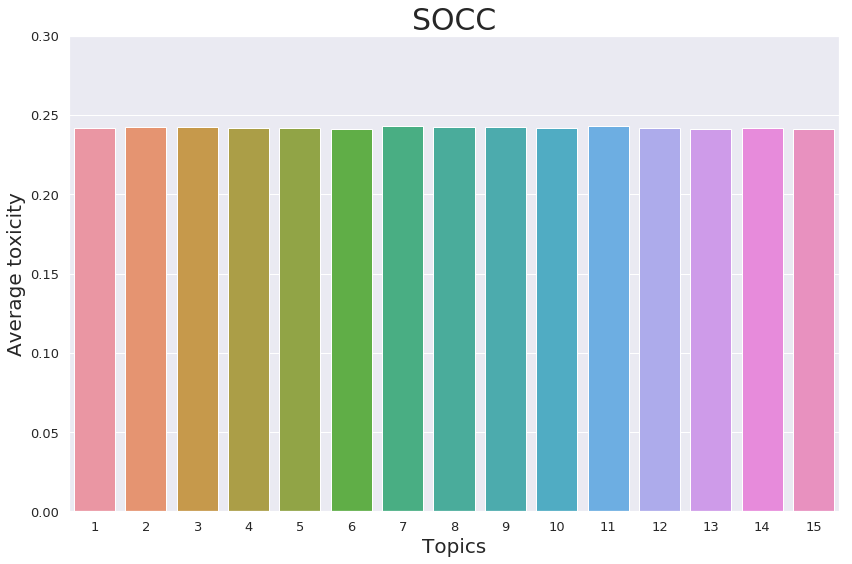

In [5]:
socc_predictions = pd.read_csv(TOPIC_MODELLING_DIR+'/results/socc_comments_topics.txt',
                               sep=';', header=None, index_col=0).rename({1 : 'topic_probabilities'},
                                                                         axis=1).reset_index(drop=True)
socc_toxicity = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Globe_and_Mail/Globe_analysis/socc_toxicity_predictions.csv', low_memory=False)

assert len(socc_predictions) == len(socc_toxicity)

socc_merged = socc_predictions.merge(socc_toxicity, left_index=True, right_index=True)

to_plot = getPlottableDataFrame(socc_merged)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])

plt.title('SOCC', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/SOCC.png')
else:
    plt.show()

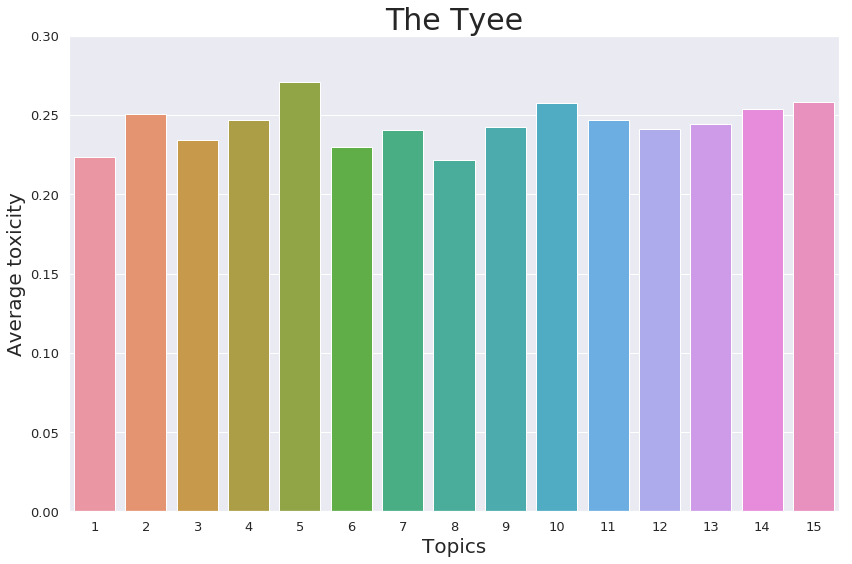

In [6]:
tyee_predictions = pd.read_csv(TOPIC_MODELLING_DIR+'/results/tyee_comments_topics.txt',
                               sep=';', header=None, index_col=0).rename({1 : 'topic_probabilities'},
                                                                         axis=1).reset_index(drop=True)
tyee_toxicity = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Tyee_data/Tyee analysis/tyee_toxicity_results.csv', low_memory=False)

assert len(tyee_predictions) == len(tyee_toxicity)

tyee_merged = tyee_predictions.merge(tyee_toxicity, left_index=True, right_index=True)

to_plot = getPlottableDataFrame(tyee_merged)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])

plt.title('The Tyee', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/The_Tyee.png')
else:
    plt.show()

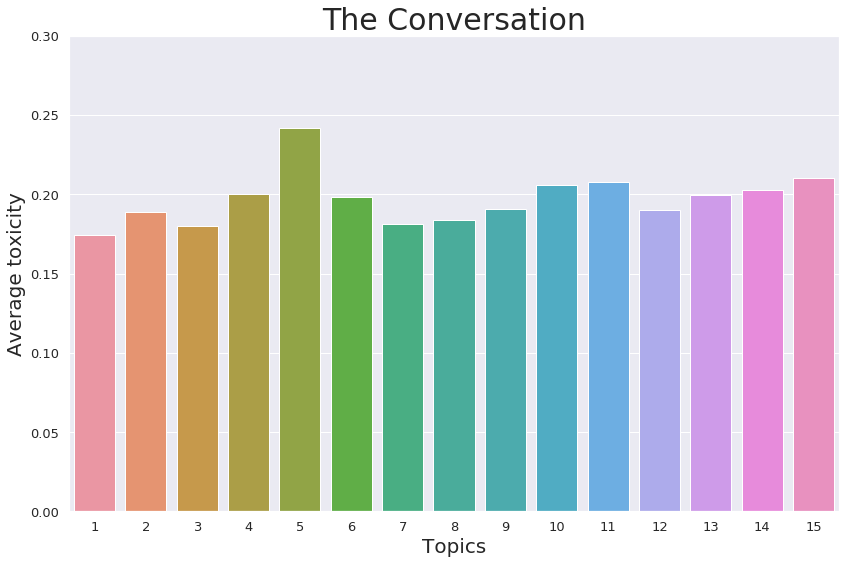

In [7]:
conv_predictions = pd.read_csv(TOPIC_MODELLING_DIR+'/results/conv_comments_topics.txt',
                               sep=';', header=None, index_col=0).rename({1 : 'topic_probabilities'},
                                                                         axis=1).reset_index(drop=True).drop(11213, axis=0)
conv_toxicity = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Conversation_data/Conversation analysis/conversation_toxicity_results.csv', low_memory=False)

assert len(conv_predictions) == len(conv_toxicity)

conv_merged = conv_predictions.merge(conv_toxicity, left_index=True, right_index=True)

to_plot = getPlottableDataFrame(conv_merged)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])

plt.title('The Conversation', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/The_Conversation.png')
else:
    plt.show()

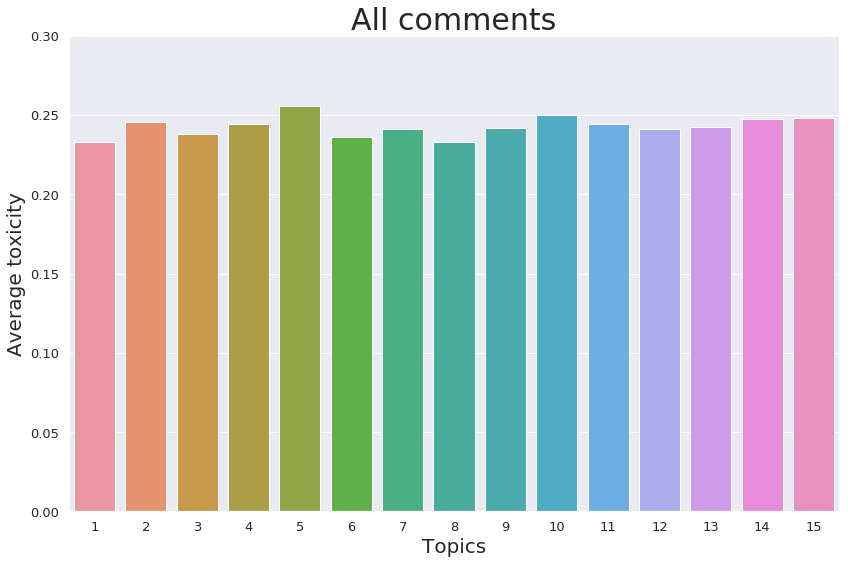

In [8]:
corpora = [conv_merged, socc_merged, tyee_merged]
all_corpora = pd.concat(corpora, axis=0, ignore_index=True, sort=False)

to_plot = getPlottableDataFrame(all_corpora)
fig = plotAgainstTopics(to_plot['x'], to_plot['y'])

plt.title('All comments', fontsize=30)
plt.tight_layout()

if SAVE:
    plt.savefig(SAVE_FOLDER+'/All_comments.png')
else:
    plt.show()